# Primary Question: What are the weekly food transaction trends?

**Note**: The time frame will be from July 1st, 2017 to present since that is when I started dating Amanda. This is the start of a meaningful epoch of behavior.

# 1. Load the Data from E&A Transactions

In [1]:
import pandas as pd
import os

# establish data pathing and files of interest
data_paths = {'in':'../../data/raw',
              'out':'../../data/processed',
             }

data_select = {'eric': 'transactions_eric.csv',
               'amanda': 'transactions_amanda.csv'
              }

In [2]:
# load the data frames into separate data frames
df_eric = pd.read_csv(os.path.join(data_paths['in'], data_select['eric']))
df_amanda = pd.read_csv(os.path.join(data_paths['in'], data_select['amanda']))

In [3]:
# view snippets of each df
df_eric.head(5)

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,4/16/2020,Amazon,AMZN MKTP US AMZN.COM/ SEATTLE WA,0.71,debit,Shopping,Citi Premier℠ Card,NaN,NaN
1,4/17/2020,Hr Dna,Electronic Deposit Hr&dna,2050.57,credit,Income,Checking,NaN,NaN
2,4/17/2020,Hr&dna,Electronic Withdrawal Hr&dna,2050.57,debit,Mortgage & Rent,Checking,NaN,NaN
3,4/17/2020,PayPal,Web Authorized Pmt Paypal,8.55,debit,Shopping,Checking,NaN,NaN
4,4/17/2020,Amazon,AMZNGrcyTip*JK7CL3ZH3 Amzn.com/bill WA,5.00,debit,Groceries,Citi Premier℠ Card,NaN,NaN


In [4]:
# view snippets of each df
df_amanda.head(5)

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,4/14/2020,CVS,CVS/PHARMACY #04483,11.45,debit,Pharmacy,Asterisk-Free Checking,NaN,NaN
1,4/07/2020,Audible.com,AUDIBLE*R27FK2PO3,16.07,debit,Books,Asterisk-Free Checking,NaN,NaN
2,4/03/2020,OSUWMC MYCHART,OSUWMC MYCHART,109.52,debit,Doctor,Asterisk-Free Checking,NaN,NaN
3,4/02/2020,INTERNET TFR FRM CHECKING,INTERNET TFR FRM CHECKING,109.00,credit,Income,Asterisk-Free Checking,NaN,NaN
4,3/31/2020,Etsy.com,ETSY.COM - EXPEDITIONS,16.07,debit,Shopping,Asterisk-Free Checking,NaN,NaN


## 1a. Combine DataFrames

In [5]:
# assign column for who purchased the transaction (for later analysis of who did the most shopping)
df_eric['purchaser'] = 'eric'
df_amanda['purchaser'] = 'amanda'

In [6]:
# check the number of transactions in each for book keeping after the join
nrows_eric = df_eric.shape[0]
nrows_amanda = df_amanda.shape[0]
print(f'There are {nrows_eric} transaction rows for Eric and {nrows_amanda} transaction rows for Amanda')
print(f'After appending, there should be {nrows_eric + nrows_amanda} total rows')

There are 6312 transaction rows for Eric and 387 transaction rows for Amanda
After appending, there should be 6699 total rows


In [7]:
# create the combine dataframe
df = df_eric.append(df_amanda)

In [8]:
df

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes,purchaser
0,4/16/2020,Amazon,AMZN MKTP US AMZN.COM/ SEATTLE WA,0.71,debit,Shopping,Citi Premier℠ Card,NaN,NaN,eric
1,4/17/2020,Hr Dna,Electronic Deposit Hr&dna,2050.57,credit,Income,Checking,NaN,NaN,eric
2,4/17/2020,Hr&dna,Electronic Withdrawal Hr&dna,2050.57,debit,Mortgage & Rent,Checking,NaN,NaN,eric
3,4/17/2020,PayPal,Web Authorized Pmt Paypal,8.55,debit,Shopping,Checking,NaN,NaN,eric
4,4/17/2020,Amazon,AMZNGrcyTip*JK7CL3ZH3 Amzn.com/bill WA,5.00,debit,Groceries,Citi Premier℠ Card,NaN,NaN,eric
...,...,...,...,...,...,...,...,...,...,...
382,11/06/2018,Venmo,VENMO PAYMENT,20.00,debit,Movies & DVDs,Asterisk-Free Checking,NaN,NaN,amanda
383,11/06/2018,Venmo,VENMO PAYMENT,13.00,debit,Movies & DVDs,Asterisk-Free Checking,NaN,NaN,amanda
384,11/06/2018,Venmo Cashout,VENMO CASHOUT,11.00,credit,Income,Asterisk-Free Checking,NaN,NaN,amanda
385,11/06/2018,Wal-Mart,WM SUPERCENTER WM SUPERCENTER COLUMBUS OH51754...,2.48,debit,Groceries,Asterisk-Free Checking,NaN,NaN,amanda


There is the correct number of rows and the purchaser column shows that the bottom rows are Amanda and the top are Eric!

## 1b. Parse down the columns of interest & type cast as needed

In [9]:
# rename the columns
df.columns = [x.lower().replace(' ','_') for x in df.columns]  # This is perhaps not as safe as doing .rename(..., inplace=True)
df.columns

Index(['date', 'description', 'original_description', 'amount',
       'transaction_type', 'category', 'account_name', 'labels', 'notes',
       'purchaser'],
      dtype='object')

In [10]:
# grab only the columns we care about
columns_of_interest = ['date','description','amount','category','purchaser']
df = df[columns_of_interest]
df.head(5)

,date,description,amount,category,purchaser
0,4/16/2020,Amazon,0.71,Shopping,eric
1,4/17/2020,Hr Dna,2050.57,Income,eric
2,4/17/2020,Hr&dna,2050.57,Mortgage & Rent,eric
3,4/17/2020,PayPal,8.55,Shopping,eric
4,4/17/2020,Amazon,5.00,Groceries,eric


In [11]:
df.dtypes

date            object
description     object
amount         float64
category        object
purchaser       object
dtype: object

In [12]:
# cast 'date', 'category' and 'purchaser' to more useful data types than string
import numpy as np
df['date'] = df['date']#.astype(np.datetime64)
#df['category'] = df['category'].astype('category')
#df['purchaser'] = df['purchaser'].astype('category')

d:\python\code\grocery_optimization\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# To investigate the 'SettingWithCopyWarning' warning, check the object ID of what is being called
df_id = id(df)
col_get_id = id(df['date'])
col_loc_id = id(df.loc[:,'date'])
col_cast_id = id(df['date'].astype(np.datetime64))
print(f'Dataframe id = {df_id}\nColumn Get id = {col_get_id}\nColumn .loc id = {col_loc_id}\nColumn Cast id = {col_cast_id}')

Dataframe id = 187843568
Column Get id = 188021296
Column .loc id = 188021296
Column Cast id = 187844208


In [14]:
# cast 'date', 'category' and 'purchaser' to more useful data types than string
import numpy as np
df.loc[:,'date'] = df.loc[:,'date'].astype(np.datetime64)
df.loc[:,'category'] = df.loc[:,'category'].astype('category')
df.loc[:,'purchaser'] = df.loc[:,'purchaser'].astype('category')

d:\python\code\grocery_optimization\venv\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
df.dtypes

date           datetime64[ns]
description            object
amount                float64
category             category
purchaser            category
dtype: object

Type casting was successful, though the '*SettingWithCopyWarning*' is worth investigating further

## 1c. Grab the rows of interest
This includes the rows as far back as 7/01/2017, as well as the Food transaction rows

In [16]:
# filter down the rows based on date recency and category relevancy
food_cats = ['Groceries','Fast Food','Work Food','Restaurants']
filt = (df['date'] >= '7/01/2017') & (df['category'].isin(food_cats))
# .copy() is needed to tell pandas to literally make this slice of a data frame into a new object
food_df = df.loc[filt,:].copy()  
food_df.head(5)

,date,description,amount,category,purchaser
4,2020-04-17,Amazon,5.00,Groceries,eric
12,2020-04-14,Amazon Fresh,45.19,Groceries,eric
16,2020-04-11,Wal-Mart,8.86,Groceries,eric
25,2020-04-08,Amazon Fresh,60.23,Groceries,eric
27,2020-04-07,Amazon Fresh,38.37,Groceries,eric


In [17]:
# change all non-grocery categories to 'Eating Out'
food_df['category'] = food_df['category'].replace({x: 'Eating Out' for x in food_cats[1:4]})
# The .replace() transformation returned a dtype='object' Series, so recast as 'category' is needed
food_df['category'] = food_df['category'].astype('category')
# This nicely parses down the 100+ categories to just the 2 we care about
food_df['category'].dtype

CategoricalDtype(categories=['Eating Out', 'Groceries'], ordered=False)

In [18]:
# finally, set the index to be 'date' and sort descending in order to sequentially mix the Eric & Amanda rows
food_df.set_index('date', inplace=True)
food_df.sort_index(ascending=False, inplace=True)

In [19]:
food_df.head(10)

,description,amount,category,purchaser
date,,,,
2020-04-17,Amazon,5.00,Groceries,eric
2020-04-14,Amazon Fresh,45.19,Groceries,eric
2020-04-11,Wal-Mart,8.86,Groceries,eric
2020-04-08,Amazon Fresh,60.23,Groceries,eric
2020-04-07,Amazon Fresh,38.37,Groceries,eric
2020-03-30,FAST N FRIENDL 367602,3.43,Eating Out,amanda
2020-03-30,TA #228 LIMON FASTFO,8.97,Eating Out,amanda
2020-03-30,Amazon Fresh,37.79,Groceries,eric
2020-03-27,BROULIM'S DRIG 348301,51.82,Groceries,amanda


In [20]:
# create a Groceries only dataframe
filt = (food_df['category'] == 'Groceries')
grc_df = food_df.loc[filt]

In [21]:
# create an Eating Out only dataframe
filt = (food_df['category'] == 'Eating Out')
eo_df = food_df.loc[filt]

# 2. Plot Food Transactions by Week

## 2a. Investigate weekly Eating Out trends

In [22]:
# Resample to a weekly basis and count number of Eating Out transactions
weekly_eo = eo_df.loc[:,['category','amount']].resample('W-MON').agg({'category':'count', 'amount':'sum'})

In [23]:
weekly_eo.rename(columns={'category':'visits'},inplace=True)
weekly_eo['amount_per_visit'] = weekly_eo['amount'] / weekly_eo['visits'] # note: this will produce some NaNs for visits=0
weekly_eo.head(5)

,visits,amount,amount_per_visit
date,,,
2017-07-10,6,50.36,8.393333
2017-07-17,9,203.47,22.607778
2017-07-24,6,44.17,7.361667
2017-07-31,2,38.03,19.015000
2017-08-07,3,22.21,7.403333


### Let's investigate the stats for these values

In [24]:
weekly_eo.describe()

,visits,amount,amount_per_visit
count,143.000000,143.000000,139.000000
mean,5.986014,72.722098,13.418043
std,3.510519,53.074029,8.994351
min,0.000000,0.000000,1.290000
25%,3.000000,41.050000,7.730556
50%,6.000000,63.520000,10.967778
75%,8.000000,95.990000,15.781944
max,17.000000,396.600000,76.630000


**Wow!** There is a week where Amanda and I spent nearly $400 eating out? When???

In [25]:
# show the week with the highest
# 1. find the week index with the highest transaction total
max_amount_filt = (weekly_eo['amount'] == weekly_eo['amount'].max())
max_week = weekly_eo.loc[max_amount_filt].index[0] # timestamp data type
# 2. from the eo_df, list all of the transactions in this week
week = pd.date_range(max_week, periods=7)
weekly_eo.loc[max_week]

visits               15.00
amount              396.60
amount_per_visit     26.44
Name: 2019-01-14 00:00:00, dtype: float64

#### So it looks like the first week of my job at Honda is when this occurred (01/14/2019)

In [26]:
week_filt = (eo_df.index >= week.min()) & (eo_df.index <= week.max())
eo_df.loc[week_filt]

,description,amount,category,purchaser
date,,,,
2019-01-19,Whitney House,86.00,Eating Out,eric
2019-01-17,Osu,13.92,Eating Out,amanda
2019-01-16,Tabletop Game Cafe LLC,14.70,Eating Out,eric
2019-01-16,Acre Grandview,9.68,Eating Out,eric
2019-01-15,Venmo,7.00,Eating Out,amanda
2019-01-14,Venmo (sushi),15.00,Eating Out,amanda
2019-01-14,Venmo,10.00,Eating Out,amanda
2019-01-14,Venmo (sushi),22.00,Eating Out,amanda


In [27]:
eo_df.loc[week_filt, 'amount'].agg(['sum', 'count'])

sum      178.3
count      8.0
Name: amount, dtype: float64

### Hold on...this is weird, why are there only 8 transactions with 178.30 total instead of 15 visits and total 396.60?!?

At first, I thought it had something to do with the aggregations done to the resampled data. As it turns out, *resample()* is roughly the same as *groupby()* except for datetime objects. the principles of 'split, apply, combine' still work

In [28]:
grps = eo_df.loc[:,['category','amount']].resample('W-MON')
grps.groups

{Timestamp('2017-07-10 00:00:00', freq='W-MON'): 6,
 Timestamp('2017-07-17 00:00:00', freq='W-MON'): 15,
 Timestamp('2017-07-24 00:00:00', freq='W-MON'): 21,
 Timestamp('2017-07-31 00:00:00', freq='W-MON'): 23,
 Timestamp('2017-08-07 00:00:00', freq='W-MON'): 26,
 Timestamp('2017-08-14 00:00:00', freq='W-MON'): 33,
 Timestamp('2017-08-21 00:00:00', freq='W-MON'): 33,
 Timestamp('2017-08-28 00:00:00', freq='W-MON'): 39,
 Timestamp('2017-09-04 00:00:00', freq='W-MON'): 42,
 Timestamp('2017-09-11 00:00:00', freq='W-MON'): 59,
 Timestamp('2017-09-18 00:00:00', freq='W-MON'): 64,
 Timestamp('2017-09-25 00:00:00', freq='W-MON'): 68,
 Timestamp('2017-10-02 00:00:00', freq='W-MON'): 76,
 Timestamp('2017-10-09 00:00:00', freq='W-MON'): 81,
 Timestamp('2017-10-16 00:00:00', freq='W-MON'): 88,
 Timestamp('2017-10-23 00:00:00', freq='W-MON'): 98,
 Timestamp('2017-10-30 00:00:00', freq='W-MON'): 104,
 Timestamp('2017-11-06 00:00:00', freq='W-MON'): 112,
 Timestamp('2017-11-13 00:00:00', freq='W-MON

Next, I thought that maybe it was something wrong with the way I was filtering my dates

In [29]:
#week_filt = (eo_df.index >= week.min()) & (eo_df.index <= week.max())
week_filt = (eo_df.index >= '2019-01-07') & (eo_df.index <= '2019-01-13')
eo_df.loc[week_filt, 'amount'].agg(['sum', 'count'])

sum      362.65
count     13.00
Name: amount, dtype: float64

What I noticed is that the week ***before*** joining Honda has almost $396 of transactions! and it's only missing 2 visits.

However, if I adjust the time window to end on a Monday (1/14/19), rather than start on it as I intended, then the 7-day history from Tuesday 1/8/19 to 1/14/19 adds up to the mysterious $396 observed when resampling...

...**Which means! That *.resample()* needs to be further specified in order to fix this behavior**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

In [30]:
#week_filt = (eo_df.index >= week.min()) & (eo_df.index <= week.max())
week_filt = (eo_df.index >= '2019-01-08') & (eo_df.index <= '2019-01-14')
eo_df.loc[week_filt, 'amount'].agg(['sum', 'count'])

sum      396.6
count     15.0
Name: amount, dtype: float64

## 2a. REDO - Fixing the resampling issues:

In [31]:
# Resample to a weekly basis and count number of Eating Out transactions
# default closed interval point & label is 'right' for 'W' for resampling
weekly_eo = eo_df.loc[:,['category','amount']]\
                 .resample('W-MON', closed='left', label='left')\
                 .agg({'category':'count', 'amount':'sum'})

In [32]:
weekly_eo.rename(columns={'category':'visits'},inplace=True)
weekly_eo['amount_per_visit'] = weekly_eo['amount'] / weekly_eo['visits'] # note: this will produce some NaNs for visits=0
weekly_eo.head(5)

,visits,amount,amount_per_visit
date,,,
2017-07-03,3,27.64,9.213333
2017-07-10,9,168.69,18.743333
2017-07-17,9,101.67,11.296667
2017-07-24,1,15.00,15.000000
2017-07-31,4,45.24,11.310000


In [33]:
weekly_eo.describe()

,visits,amount,amount_per_visit
count,144.000000,144.000000,139.000000
mean,5.944444,72.217083,13.576347
std,3.453543,50.122940,9.613467
min,0.000000,0.000000,2.687500
25%,3.000000,40.657500,8.093571
50%,6.000000,63.410000,11.250000
75%,8.000000,99.442500,15.809066
max,15.000000,362.650000,76.630000


In [34]:
# show the week with the highest
# 1. find the week index with the highest transaction total
max_amount_filt = (weekly_eo['amount'] == weekly_eo['amount'].max())
max_week = weekly_eo.loc[max_amount_filt].index[0] # timestamp data type
# 2. from the eo_df, list all of the transactions in this week
week = pd.date_range(max_week, periods=7)
weekly_eo.loc[max_week]

visits               13.000000
amount              362.650000
amount_per_visit     27.896154
Name: 2019-01-07 00:00:00, dtype: float64

In [35]:
week_filt = (eo_df.index >= week.min()) & (eo_df.index <= week.max())
eo_df.loc[week_filt] # view the transactions

,description,amount,category,purchaser
date,,,,
2019-01-13,Tensuke Market,42.79,Eating Out,eric
2019-01-11,Fresh To Order,23.50,Eating Out,eric
2019-01-11,Dayton Internati,74.25,Eating Out,eric
2019-01-11,Venmo,22.00,Eating Out,eric
2019-01-10,Chick-Fil-A,15.04,Eating Out,eric
2019-01-10,Stonefish Sushi More,41.00,Eating Out,eric
2019-01-09,Venmo (Stupid Moab food),9.00,Eating Out,amanda
2019-01-09,Bangkok House Too,52.00,Eating Out,eric
2019-01-08,Venmo,9.00,Eating Out,eric


In [36]:
# Double Check the sum and count 
eo_df.loc[week_filt, 'amount'].agg(['sum', 'count'])

sum      362.65
count     13.00
Name: amount, dtype: float64

## 2b. Plot the weekly Eating Out Data

In [37]:
# create a rolling average of visits
roll_avg = weekly_eo.rolling(10).mean()

In [38]:
# create a date range for plotting
months_xticks = pd.date_range(weekly_eo.index.min(), weekly_eo.index.max(), freq='M')
months_xticks

DatetimeIndex(['2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29'],
              dtype='datetime64[ns]', freq='M')

In [39]:
%matplotlib inline

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


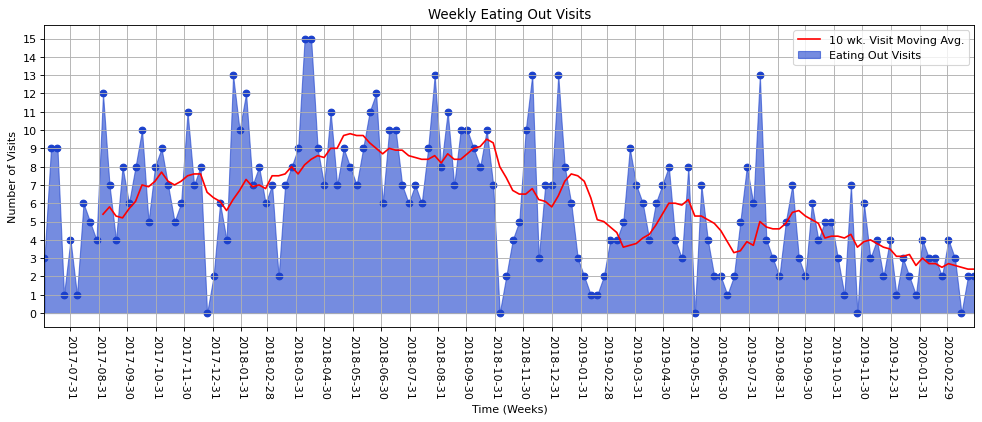

In [40]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
# plot the data
plt.fill_between(weekly_eo.index, weekly_eo['visits'], y2=0, color=(0.1,0.25,.8,.6), label='Eating Out Visits')
#plt.fill_between(weekly_eo.index, weekly_eo['visits']+5, y2=weekly_eo['visits'], color=(0.9,0.25,.8,.6))
plt.scatter(weekly_eo.index, weekly_eo['visits'], c=(0.1,0.25,.8,1))
plt.plot(roll_avg['visits'], c='r', label='10 wk. Visit Moving Avg.')
# handle axis ticks & limits
plt.xticks(months_xticks, rotation=-90)
plt.yticks(np.arange(min(weekly_eo['visits']), max(weekly_eo['visits'])+1, 1.0))
plt.xlim([weekly_eo.index.min(), weekly_eo.index.max()])
plt.grid()
# describe the graph
plt.legend()
plt.xlabel('Time (Weeks)')
plt.ylabel('Number of Visits')
plt.title('Weekly Eating Out Visits')
plt.show()

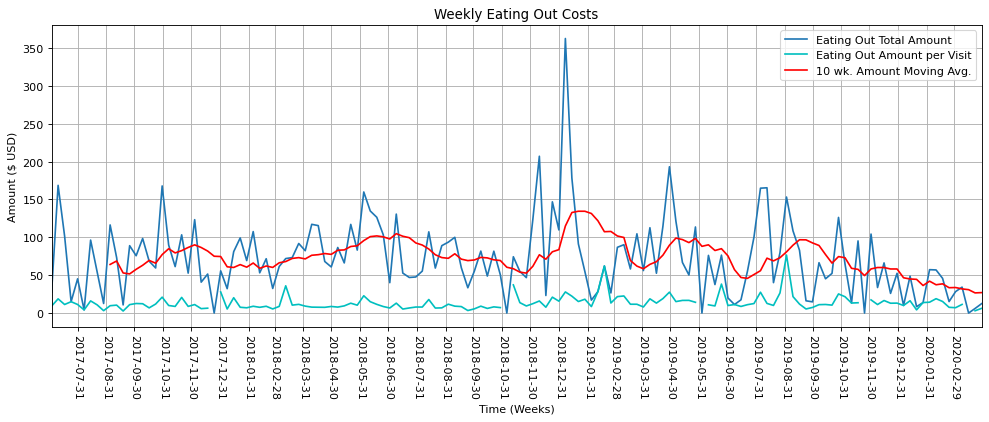

In [41]:
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
# plot the data
plt.plot(weekly_eo.index, weekly_eo['amount'], label='Eating Out Total Amount')
plt.plot(weekly_eo.index, weekly_eo['amount_per_visit'], c='c', label='Eating Out Amount per Visit')
plt.plot(roll_avg['amount'], c='r', label='10 wk. Amount Moving Avg.')
# handle axis ticks & limits
plt.xticks(months_xticks, rotation=-90)
plt.xlim([weekly_eo.index.min(), weekly_eo.index.max()])
plt.grid()
# describe the graph
plt.legend()
plt.xlabel('Time (Weeks)')
plt.ylabel('Amount ($ USD)')
plt.title('Weekly Eating Out Costs')
plt.show()

## 2c. Investigate Grocery Categories

In [44]:
grc_df['description'].value_counts()

Wal-Mart                             140
Giant Eagle                          120
Kroger                                51
Aldi                                  30
United Dairy                          15
Venmo                                 13
Patel Brothers                         8
Lucky's Market                         6
Amazon Fresh                           6
Meijer                                 4
Lucky                                  4
Trader Joe's                           2
PATEL BROTHERS COLUMBUS OH             2
FRESH THYME #307 MAYFIELD HGHT OH      1
GOOD FOODS CO-OP LEXINGTON KY          1
Patel Brothers Patel                   1
BROULIM'S DRIG 348301                  1
DON LEOS MARKET DANVILLE OH            1
Marcs                                  1
Venmo -- Lucky's Market                1
Amazon                                 1
Venmo -- Misfit Markets                1
Casey's                                1
Heinen's                               1
Whole Foods     

#### It seems like there is some data cleaning still needed.
The steps will be as follows:

1. Remove all Venmo transactions since they're sign (income or expense) cannot be determine, nor for which grocery store
2. Remove Tensuke Market, since that is a fast food sushi place (though super good)
3. Consolidate alternate spellings for the same Grocery store (ex: Patel Brothers)
4. re-evaluate the frequency of grocery stores to aggregate a group of 'Other' stores

In [52]:
# 1. remove venmo transactions
venmo_filt = (grc_df['description'].str.contains('Venmo'))
grc_df = grc_df.loc[~venmo_filt,:]

In [53]:
# 2. remove Tensuke Market transaction
tensuke_filt = (grc_df['description'].str.contains('Tensuke'))
grc_df = grc_df.loc[~tensuke_filt,:]

In [66]:
# 3. consolidate alternate spellings using Series.str.replace() method
# 3a.Patel Brothers first...
patel_filt = grc_df['description'].str.contains('Patel Brothers', case=False) # match case in-sensitively
to_replace = grc_df.loc[patel_filt,'description'].unique()
grc_df['description'].replace(to_replace=to_replace, value='Patel Brothers', inplace=True)

In [69]:
# 3. consolidate alternate spellings using Series.str.replace() method
# 3b. Lucky's Market next...
lucky_filt = grc_df['description'].str.contains('Lucky', case=False) # match case in-sensitively
to_replace = grc_df.loc[lucky_filt,'description'].unique()
grc_df['description'].replace(to_replace=to_replace, value="Lucky's Market", inplace=True)

In [71]:
# 3. consolidate alternate spellings using Series.str.replace() method
# 3c. Amazon last...
amzn_filt = grc_df['description'].str.contains('Amazon', case=False) # match case in-sensitively
to_replace = grc_df.loc[amzn_filt,'description'].unique()
grc_df['description'].replace(to_replace=to_replace, value="Amazon Fresh", inplace=True)

In [84]:
# 4. decided that all stores visited 5 or fewer times will be listed as 'Other'
store_counts = grc_df['description'].value_counts()
store_filt = (store_counts > 5)
to_replace = store_counts.index[~store_filt]
grc_df['description'].replace(to_replace=to_replace, value="Other", inplace=True)

In [129]:
store_counts = grc_df['description'].value_counts()
store_counts

Wal-Mart          140
Giant Eagle       120
Kroger             51
Aldi               30
United Dairy       15
Other              14
Patel Brothers     11
Lucky's Market     10
Amazon Fresh        7
Name: description, dtype: int64

**Conclusion**: Reduced the number of unique grocery stores to 9 of the most prevalent

## 2d. Group by Store & Resample to Weekly basis

In [158]:
weekly_grc_by_store = grc_df.groupby('description')\
                            .resample('W-MON', closed='left', label='left')\
                            .agg({'category':'count', 'amount':'sum'})
weekly_grc_by_store.rename(columns={'category':'count'}, inplace=True)

In [159]:
# investigate the new dataframe
weekly_grc_by_store

count  amount
description date                     
Aldi        2017-10-30      1    9.59
            2017-11-06      0    0.00
            2017-11-13      0    0.00
            2017-11-20      0    0.00
            2017-11-27      0    0.00
...                       ...     ...
Wal-Mart    2020-03-09      0    0.00
            2020-03-16      0    0.00
            2020-03-23      0    0.00
            2020-03-30      0    0.00
            2020-04-06      1    8.86

[1050 rows x 2 columns]

In [164]:
# confirm that I can access stores as the top-level index
weekly_grc_by_store.loc['Kroger']

,count,amount
date,,
2017-07-24,1,68.99
2017-07-31,1,8.58
2017-08-07,0,0.00
2017-08-14,1,64.15
2017-08-21,0,0.00
...,...,...
2019-12-23,0,0.00
2019-12-30,0,0.00
2020-01-06,1,76.58


In [100]:
# investigate the new dataframe's index structure
midx = weekly_grc_by_store.index  # it's a multi-index with (store_name, week_date) as the tuples
midx

MultiIndex([(    'Aldi', '2017-10-30'),
            (    'Aldi', '2017-11-06'),
            (    'Aldi', '2017-11-13'),
            (    'Aldi', '2017-11-20'),
            (    'Aldi', '2017-11-27'),
            (    'Aldi', '2017-12-04'),
            (    'Aldi', '2017-12-11'),
            (    'Aldi', '2017-12-18'),
            (    'Aldi', '2017-12-25'),
            (    'Aldi', '2018-01-01'),
            ...
            ('Wal-Mart', '2020-02-03'),
            ('Wal-Mart', '2020-02-10'),
            ('Wal-Mart', '2020-02-17'),
            ('Wal-Mart', '2020-02-24'),
            ('Wal-Mart', '2020-03-02'),
            ('Wal-Mart', '2020-03-09'),
            ('Wal-Mart', '2020-03-16'),
            ('Wal-Mart', '2020-03-23'),
            ('Wal-Mart', '2020-03-30'),
            ('Wal-Mart', '2020-04-06')],
           names=['description', 'date'], length=1050)

In [98]:
# test out the indexing of a multi-index
weekly_grc_by_store.loc[('Aldi', '2017-10-30')]

category    1.00
amount      9.59
Name: (Aldi, 2017-10-30 00:00:00), dtype: float64

More reading about multi-index can be found here: https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [101]:
# explore the methods available to multi-index objects
dir(midx)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_dis

In [162]:
# to get the values of a level, use this method
midx.get_level_values(level=0)

Index(['Aldi', 'Aldi', 'Aldi', 'Aldi', 'Aldi', 'Aldi', 'Aldi', 'Aldi', 'Aldi',
       'Aldi',
       ...
       'Wal-Mart', 'Wal-Mart', 'Wal-Mart', 'Wal-Mart', 'Wal-Mart', 'Wal-Mart',
       'Wal-Mart', 'Wal-Mart', 'Wal-Mart', 'Wal-Mart'],
      dtype='object', name='description', length=1050)

In [115]:
# create a dictionary of store plotting information
store_names = midx.get_level_values(level=0).unique().to_list()
store_plot_info = {x: {'color':(1.0, 1.0, 1.0, 0.75), # store's fill_between color code
                       'y2_lb': 'default'             # store's y2_lower_bound for fill_between stacking
                      } for x in store_names}

In [114]:
# Set some color info manually... (random for now)
store_plot_info['Aldi']['color'] = (0.0, 1.0, 1.0, 0.75)
store_plot_info['Amazon Fresh']['color'] = (1.0, 0.0, 1.0, 0.75)
store_plot_info['Giant Eagle']['color'] = (1.0, 0.0, 1.0, 0.75)
store_plot_info['Kroger']['color'] = (1.0, 0.0, 0.0, 0.75)
store_plot_info["Lucky's Market"]['color'] = (0.0, 0.0, 1.0, 0.75)
store_plot_info['Other']['color'] = (0.0, 0.0, 0.0, 0.75)
store_plot_info['Patel Brothers']['color'] = (0.0, 0.5, 1.0, 0.75)
store_plot_info['United Dairy']['color'] = (1.0, 0.5, 0.0, 0.75)
store_plot_info['Wal-Mart']['color'] = (0.5, 1.0, 0.0, 0.75)

['Aldi',
 'Amazon Fresh',
 'Giant Eagle',
 'Kroger',
 "Lucky's Market",
 'Other',
 'Patel Brothers',
 'United Dairy',
 'Wal-Mart']

In [155]:
# Goal: Set the store stacking order such that the store with higher # of transactions stacks below less frequent stores
store_counts = grc_df['description'].value_counts() # re-iterated for clarity. this series comes nicely sorted

for store in store_names:
    # find the name of the first store that has a higher count that the currently selected store
    filt = store_counts > store_counts[store]
    all_stores_higher = store_counts.loc[filt].reset_index().rename(columns={'index':'store'})
    print('\n'+'='*60)
    print(f'current store: {store}')
    print(all_stores_higher)
    if not all_stores_higher.empty:
        next_higher_store = all_stores_higher.iloc[-1]['store']
    else:
        next_higher_store = 'default' # this is the most frequent store
    print(f'current store: {store}\thigher store: {next_higher_store}')
    # fill in the lower bound store name
    store_plot_info[store]['y2_lb'] = next_higher_store


current store: Aldi
         store  description
0     Wal-Mart          140
1  Giant Eagle          120
2       Kroger           51
current store: Aldi	higher store: Kroger

current store: Amazon Fresh
            store  description
0        Wal-Mart          140
1     Giant Eagle          120
2          Kroger           51
3            Aldi           30
4    United Dairy           15
5           Other           14
6  Patel Brothers           11
7  Lucky's Market           10
current store: Amazon Fresh	higher store: Lucky's Market

current store: Giant Eagle
      store  description
0  Wal-Mart          140
current store: Giant Eagle	higher store: Wal-Mart

current store: Kroger
         store  description
0     Wal-Mart          140
1  Giant Eagle          120
current store: Kroger	higher store: Giant Eagle

current store: Lucky's Market
            store  description
0        Wal-Mart          140
1     Giant Eagle          120
2          Kroger           51
3            Aldi      

## 2e. Plot Weekly Grocery Visits by Store

#### In order to make sure we can plot a stackplot, the time indices of all the store visits need to be unified

In [184]:
# create a temporary data_frame to list the min and max date used in each
time_extrema = weekly_grc_by_store.reset_index().groupby('description')['date'].agg(['min','max'])
# capture the extrema of all store time series
min_date = time_extrema['min'].min()
max_date = time_extrema['max'].max()
print(f'The overall min date = {min_date}\nThe overall max date = {max_date}')

The overall min date = 2017-07-03 00:00:00
The overall max date = 2020-04-13 00:00:00


In [192]:
# create a date range between the extrema as index for a zeroed data frame
full_time_index = pd.date_range(min_date, max_date, freq='W-MON')
full_time_index.name = 'date'

In [212]:
# create a blank dataframe
zero_df = pd.DataFrame(index=full_time_index)
zero_df['count'] = 0.0
zero_df['amount'] = 0.0
zero_df.head(5)

,count,amount
date,,
2017-07-03,0.0,0.0
2017-07-10,0.0,0.0
2017-07-17,0.0,0.0
2017-07-24,0.0,0.0
2017-07-31,0.0,0.0


In [213]:
test = weekly_grc_by_store.loc['Aldi']
test

,count,amount
date,,
2017-10-30,1,9.59
2017-11-06,0,0.00
2017-11-13,0,0.00
2017-11-20,0,0.00
2017-11-27,0,0.00
...,...,...
2020-02-10,0,0.00
2020-02-17,0,0.00
2020-02-24,0,0.00


**Note**:
More info on data joins available here: https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

This includes the datetime specific join merge_asof()

In [247]:
store_dfs = {x: None for x in store_names}

In [248]:
for store in store_names:
    # merge the dataframes such that all dates in zero_df that aren't in the store's time index produce NaNs 
    df_merge = pd.merge(zero_df, weekly_grc_by_store.loc[store], on='date', how='left', suffixes=('_left','_right'))
    # fill NaN values with 0.0 for addition
    df_merge.fillna(0.0, inplace=True)
    df_merge['count'] = df_merge['count_left'] + df_merge['count_right']
    df_merge['amount'] = df_merge['amount_left'] + df_merge['amount_right']
    # drop the merged column names
    df_merge.drop(df_merge.columns[df_merge.columns.str.contains('_')], axis='columns', inplace = True)
    store_dfs[store] = df_merge

In [249]:
id(store_dfs['Wal-Mart']), id(zero_df)

(250750320, 250867440)

In [257]:
weekly_grc_by_store = pd.concat(store_dfs)
weekly_grc_by_store

count  amount
         date                     
Aldi     2017-07-03    0.0    0.00
         2017-07-10    0.0    0.00
         2017-07-17    0.0    0.00
         2017-07-24    0.0    0.00
         2017-07-31    0.0    0.00
...                    ...     ...
Wal-Mart 2020-03-16    0.0    0.00
         2020-03-23    0.0    0.00
         2020-03-30    0.0    0.00
         2020-04-06    1.0    8.86
         2020-04-13    0.0    0.00

[1314 rows x 2 columns]

In [227]:
# merge the dataframes such that all dates in zero_df that aren't in the store's time index produce NaNs 
df_merge = pd.merge(zero_df, test, on='date', how='left', suffixes=('_left','_right'))
# fill NaN values with 0.0 for addition
df_merge.fillna(0.0, inplace=True)
df_merge['count'] = df_merge['count_left'] + df_merge['count_right']
df_merge['amount'] = df_merge['amount_left'] + df_merge['amount_right']
# drop the merged column names
df_merge.drop(df_merge.columns[df_merge.columns.str.contains('_')], axis='columns', inplace = True)
df_merge

,count,amount
date,,
2017-07-03,0.0,0.0
2017-07-10,0.0,0.0
2017-07-17,0.0,0.0
2017-07-24,0.0,0.0
2017-07-31,0.0,0.0
...,...,...
2020-03-16,0.0,0.0
2020-03-23,0.0,0.0
2020-03-30,0.0,0.0


In [266]:
store_counts.loc['Kroger']

51

In [268]:
# sort the store names based on value counts
store_names.sort(reverse=True, key=lambda x: store_counts.loc[x])
store_names

['Wal-Mart',
 'Giant Eagle',
 'Kroger',
 'Aldi',
 'United Dairy',
 'Other',
 'Patel Brothers',
 "Lucky's Market",
 'Amazon Fresh']

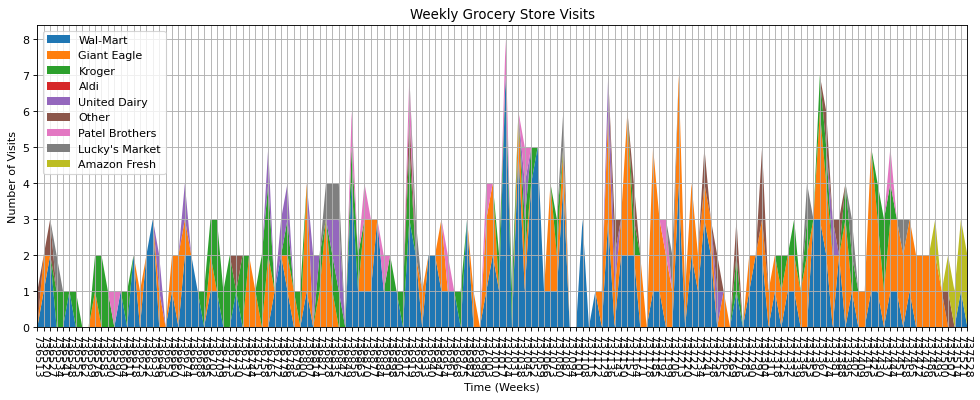

In [283]:
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

# handle axis ticks & limits
plt.xticks(pd.date_range(time_data.min(), time_data.max(),freq='W-MON'), rotation=-90)
plt.yticks(np.arange(min(weekly_eo['visits']), max(weekly_eo['visits'])+1, 1.0))
plt.xlim([time_data.min(), time_data.max()])
plt.grid()

# plot
time_data = weekly_grc_by_store.loc['Wal-Mart'].index
y1d = weekly_grc_by_store.loc['Wal-Mart', 'count']
y2d = weekly_grc_by_store.loc['Giant Eagle', 'count']
y = [y1d, y2d]
y = [weekly_grc_by_store.loc[store, 'count'] for store in store_names]
plt.stackplot(time_data, y, labels=store_names, baseline='zero')


# describe the graph
plt.legend(loc='upper left')
plt.xlabel('Time (Weeks)')
plt.ylabel('Number of Visits')
plt.title('Weekly Grocery Store Visits')
plt.show()

### Does the Grocery Store overall envlope look the same?